# **Customer Segmentation with K-Means Clustering**

**Importing important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Loading the dataset**

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Basic statistical details of the dataset
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
# Checking for missing values
print(data.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'Distribution of Annual Income')

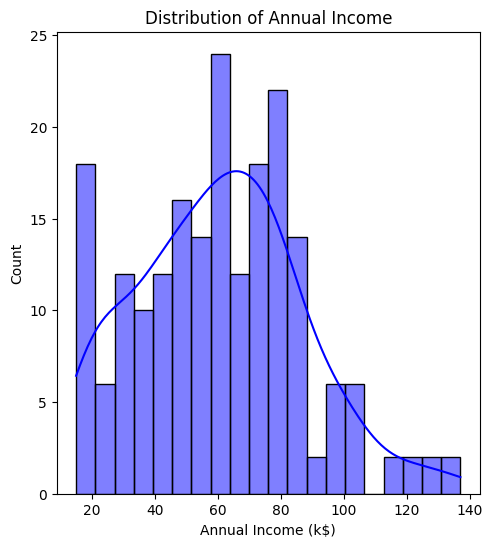

In [ ]:
# Distribution of Annual Income and Spending Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20, color='blue')
plt.title('Distribution of Annual Income')

From the above graph, we can see that the distribution appears to be approximately normal but slightly right-skewed, indicating that there are a few customers with significantly higher incomes.

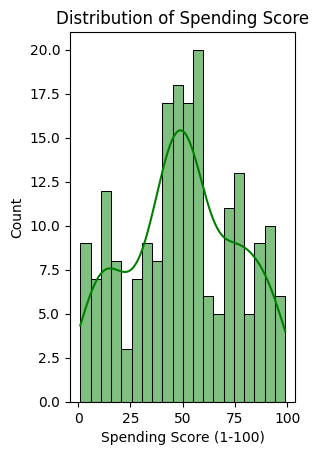

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title('Distribution of Spending Score')
plt.show()

From the above graph, we can see that the distribution appears to be approximately normal.

## **Data Preprocessing**

In [ ]:
# Selecting the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In the above step, we scales the features to ensure that they have a mean of 0 and a standard deviation of 1. This is important because features with different scales can disproportionately influence the results of clustering algorithms like K-Means.

## **Applying K-Means Clustering**

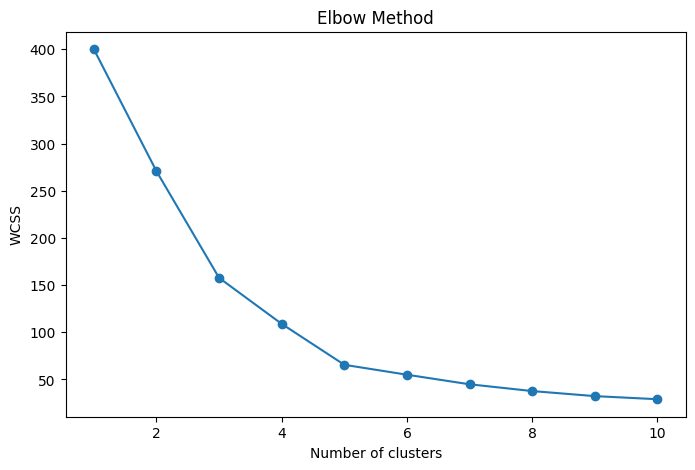

In [ ]:
# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow graph, we choose the number of clusters (e.g., k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

## **Visualizing the Clusters**

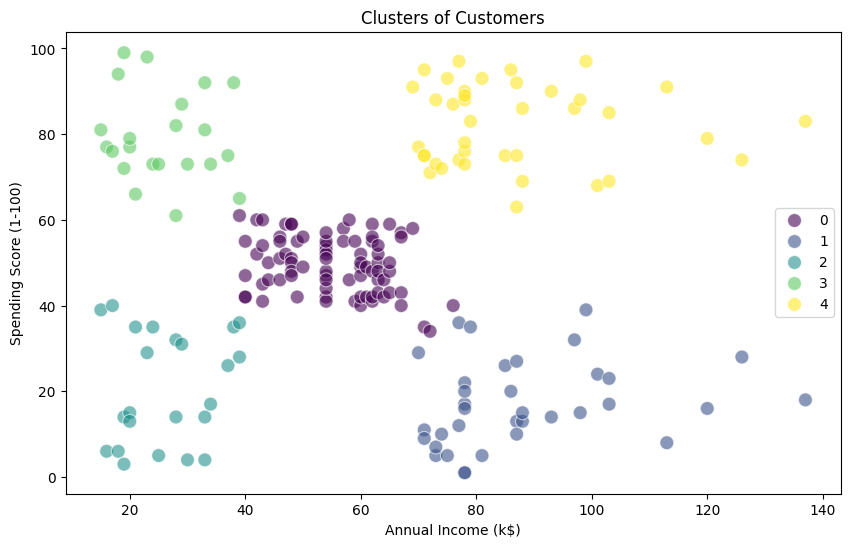

In [ ]:
# Adding the cluster labels to the original dataset
data['Cluster'] = y_kmeans

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=data, s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **Conclusion from the Graph**

**Cluster 0 (Purple):**

This cluster consists of customers with medium annual income (around 60-70k) and medium spending scores (around 40-60).
These customers are average earners and spenders.

**Cluster 1 (Blue):**

Customers in this cluster have high annual income (more than 60k) and low spending scores (less than 40).
These might be high-income customers who are conservative in their spending.

**Cluster 2 (Cyan):**

This cluster includes customers with low annual income (less than 50k) and a low spending scores (less than 50).
These are budget-conscious customers with limited spending capacity.

**Cluster 3 (Green):**

These customers have low annual income (less than 05k) but hugh spending scores (more than 50).
These customers spend a lot relative to their income, possibly younger or more extravagant.


**Cluster 4 (Yellow):**

Customers in this cluster have high annual income (greater than 70k) and high spending scores (greater than 60).
These are high-income and high-spending customers, likely the most profitable segment for businesses.